In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def mid_trans(channel, kernel_size, fill=0):
    total_length = kernel_size * kernel_size
    offset = kernel_size // 2
    source = channel.copy()
    y_length, x_length = source.shape
    for y_index in range(y_length):
        for x_index in range(x_length):
            x_start = x_index - 1
            y_start = y_index - 1
            x_start = x_index if x_start < 0 else x_start
            y_start = y_index if y_start < 0 else y_start
            x_end = min(x_length, x_index + offset + 1)
            y_end = min(y_length, y_index + offset + 1)
            data = channel[y_start:y_end, x_start:x_end].ravel()
            add_zero = total_length - len(data)
            # 补0
            for _ in range(add_zero):
                data = np.append(data, fill)
            mid_value = np.median(data)
            source[y_index,x_index] = mid_value
    return source

def my_mediaBlur(image, to_rgb=None, kernel_size=3, fill=0):
    if to_rgb is not None:
        image = cv2.cvtColor(image, to_rgb)
    
    rc, gc, bc = cv2.split(image)
    mid_r = mid_trans(rc, kernel_size, fill)
    mid_g = mid_trans(gc, kernel_size, fill)
    mid_b = mid_trans(bc, kernel_size, fill)
    return cv2.merge((mid_r, mid_g, mid_b))
        

In [ ]:
def image_show(image, model=None, location=None, show=False):
    if model is not None:
        image = cv2.cvtColor(image, model)
        
    if location is not None:
        plt.subplot(location)
        
    plt.imshow(image)
    if location is None or show:
        plt.show()

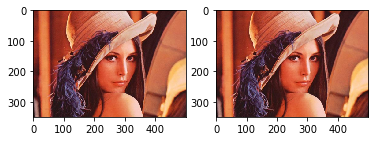

In [20]:
lenna_bgr = cv2.imread('lenna.jpg')
lenna_rgb = cv2.cvtColor(lenna_bgr, cv2.COLOR_BGR2RGB)
system_media = cv2.medianBlur(lenna_rgb, 3)
my_media = my_mediaBlur(lenna_rgb, kernel_size=3)
image_show(system_media, location=121)
image_show(my_media, location=122, show=True)

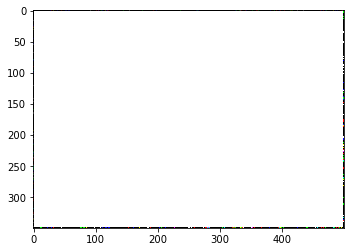

In [21]:
compare_index = system_media == my_media
compare_image = np.zeros(compare_index.shape)
compare_image[compare_index] = 255
compare_reverse = compare_index == False
compare_image[compare_reverse] = 0
image_show(compare_image.astype('uint8'))